In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


Reading CSV File 

In [156]:
df=pd.read_excel('Telco_customer_churn.xlsx')

Feature control

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.


In [157]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [158]:
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'unique_values': df.nunique()
})

print(summary)

                     dtype  unique_values
CustomerID          object           7043
Count                int64              1
Country             object              1
State               object              1
City                object           1129
Zip Code             int64           1652
Lat Long            object           1652
Latitude           float64           1652
Longitude          float64           1651
Gender              object              2
Senior Citizen      object              2
Partner             object              2
Dependents          object              2
Tenure Months        int64             73
Phone Service       object              2
Multiple Lines      object              3
Internet Service    object              3
Online Security     object              3
Online Backup       object              3
Device Protection   object              3
Tech Support        object              3
Streaming TV        object              3
Streaming Movies    object        

We can drop `Count, Country and State` features because there in only 1 unique value in all of them. Besides them, `Zip Code and CustomerID` doesn't carry any meaningful data for the model. We can drop them in later.

In [159]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [160]:
correlations=df.corr(numeric_only=True)

<Axes: title={'center': 'Correlation Matrix Before Encoding'}>

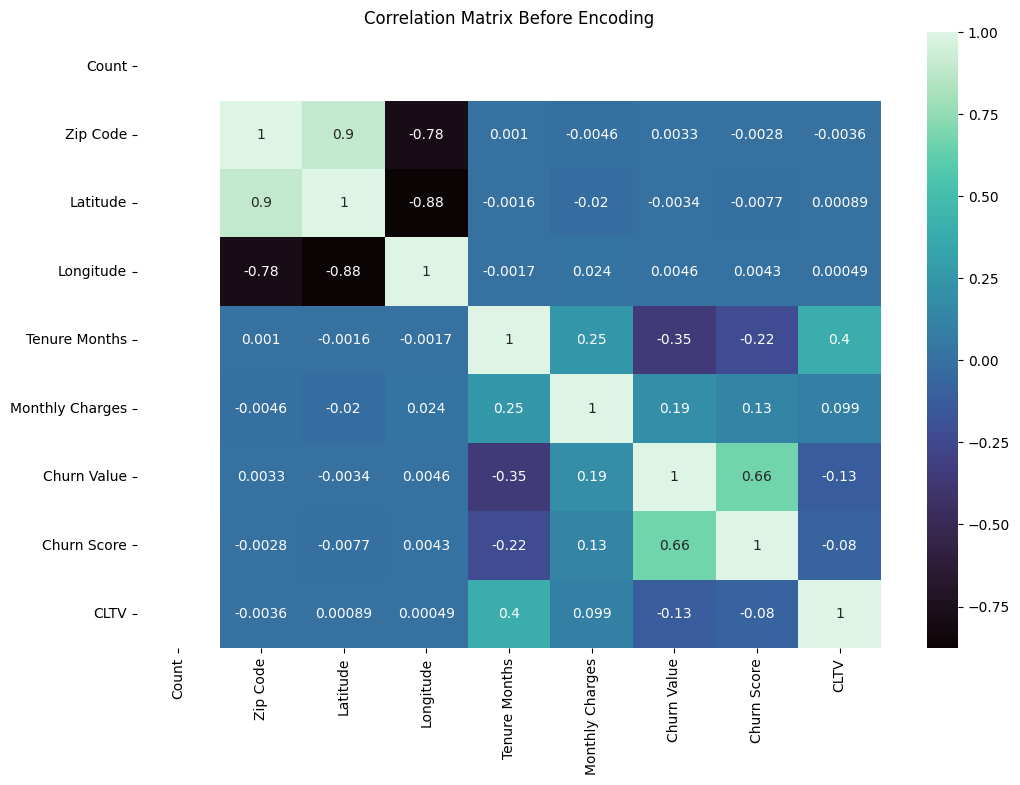

In [161]:
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix Before Encoding')
sns.heatmap(correlations, annot=True,cmap='mako')

In [162]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

The main reason for churn is the `Attitude of Support Person`. `Competitor offered higher download speeds` follows with 189 values. This shows that technical support and quality is essencial in the service sector.

In [163]:
churn_reason_counts = df['Churn Reason'].value_counts().head(25)

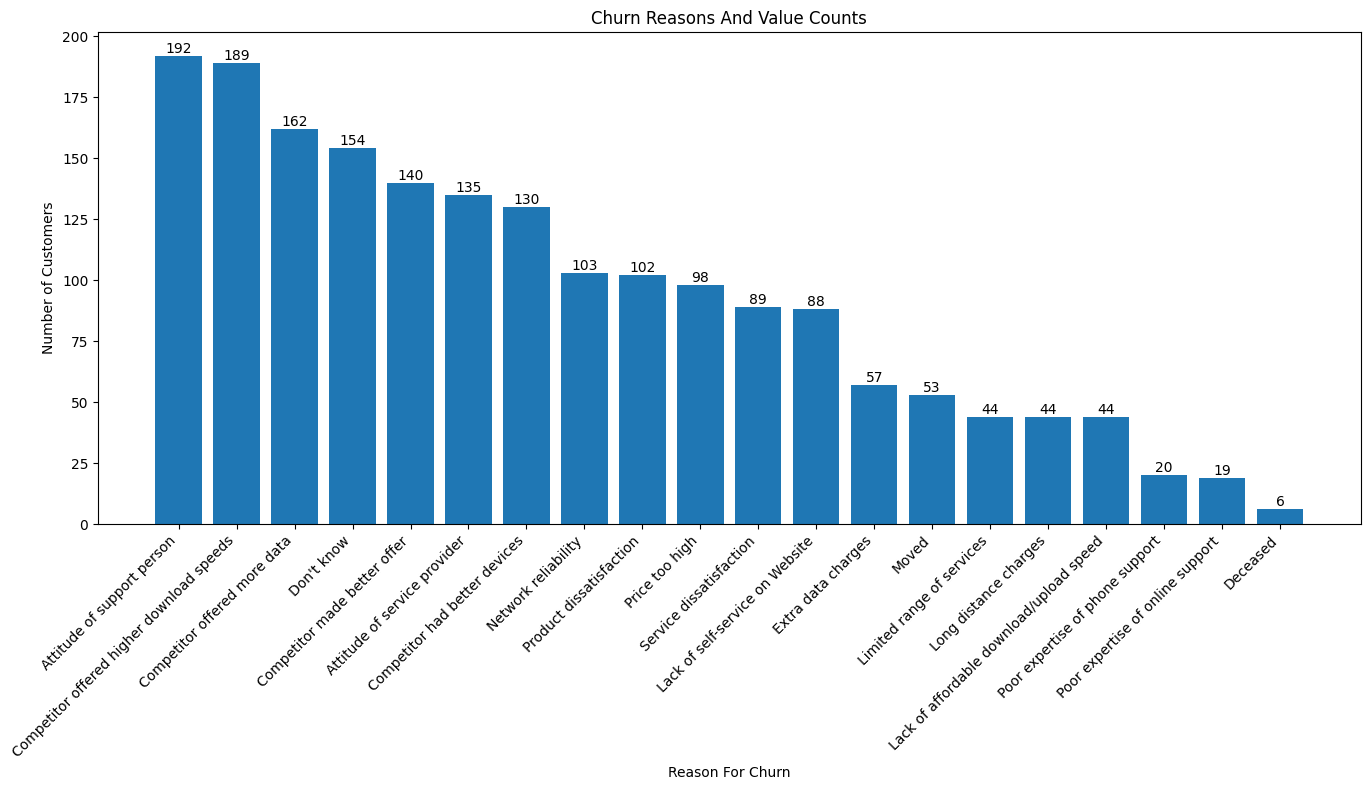

In [164]:
plt.figure(figsize=(14, 8))
bars = plt.bar(churn_reason_counts.index, churn_reason_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title("Churn Reasons And Value Counts")
plt.xlabel("Reason For Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [165]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

There is class imbalance in the dataset. This makes sense, because generally churn counts are less than the not churn counts. We maybe will use SMOTE or different technique later. This plot means that we cant just rely on the accuracy metric

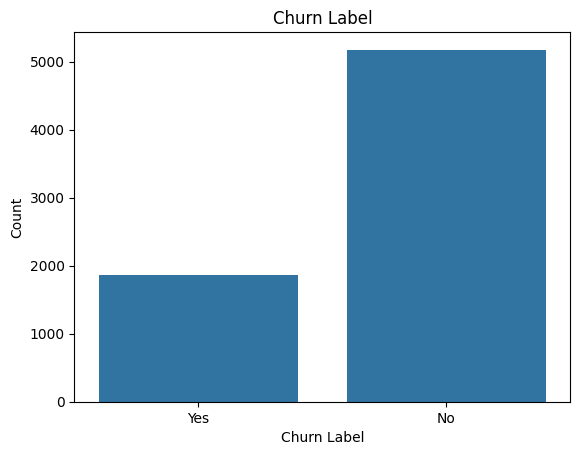

In [166]:
sns.countplot(data=df, x='Churn Label')
plt.title('Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()

Lattitude and Longitude is given in the data. So we can try to plot these values to get the map. We can't say location is highly correlated to Churns with this table only. So we will plot 

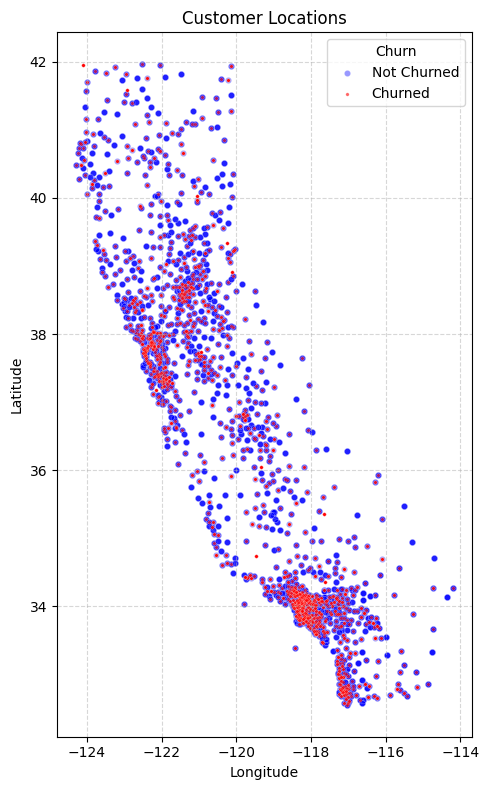

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,8))

sns.scatterplot(
    data=df[df["Churn Value"] == 0],
    x="Longitude",
    y="Latitude",
    label="Not Churned",
    color="blue",
    alpha=0.4,
    s=20
)

sns.scatterplot(
    data=df[df["Churn Value"] == 1],
    x="Longitude",
    y="Latitude",
    label="Churned",
    color="red",
    alpha=0.6,
    s=6,
)

plt.title("Customer Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


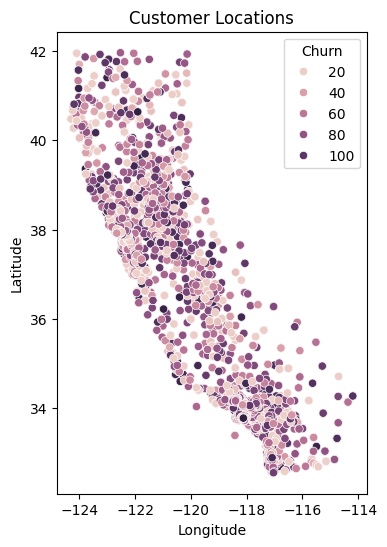

In [90]:
plt.figure(figsize=(4,6))

sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Monthly Charges")

plt.title("Customer Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Churn")

In [91]:
from sklearn.cluster import KMeans

In [92]:
df_test=df.copy()

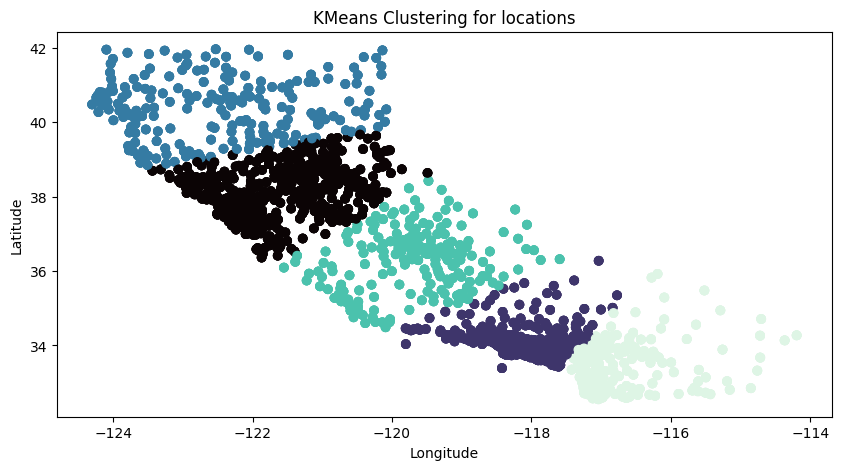

In [93]:

geo_data = df_test[['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['zone_id'] = kmeans.fit_predict(geo_data)

plt.figure(figsize=(10,5))
plt.scatter(df['Longitude'], df['Latitude'], c=df['zone_id'], cmap='mako')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering for locations')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

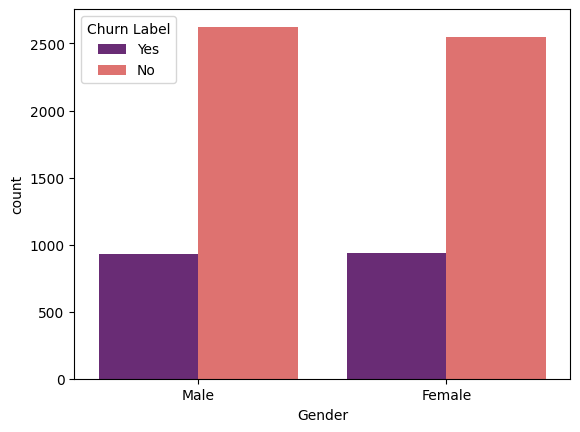

In [94]:
sns.countplot(data=df,x='Gender',hue='Churn Label',palette='magma')

In [95]:
labelEncoder_gender=LabelEncoder()

In [96]:
df['Gender']=labelEncoder_gender.fit_transform(df['Gender'])

In [97]:
df['City'].nunique()

1129

In [98]:
df['City'].value_counts().head(5)

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
Name: count, dtype: int64

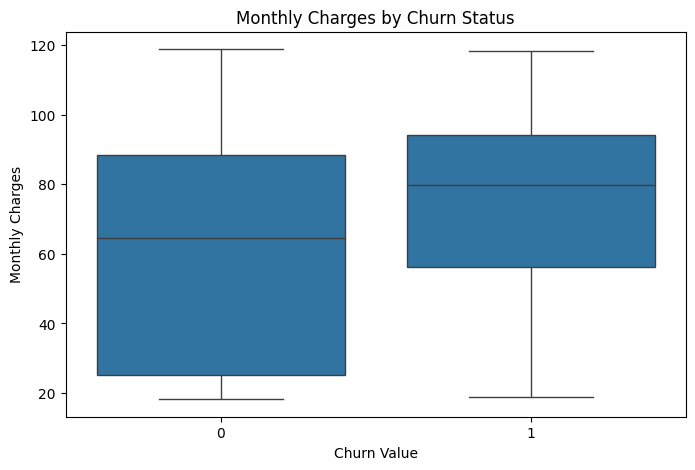

In [99]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

Couldn't figure out how to plot top 10 city with respect to Churn Labels.

In [100]:
#top_10_city = df['City'].value_counts().head(10).index
#sns.countplot(data=df,x=top_10_city,hue='Churn Label')

In [101]:
df['Total Charges'].isna().sum()

0

In [102]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                 int32
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
zone_id                int32
dtype: object

Total Charges includes Float values but type is `Object`. We need to convert it. Tried "astype" function but didn't work for some reason.


In [103]:
#df['Total Charges'] = df['Total Charges'].astype(float)

In [104]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [105]:
df['Total Charges'].isnull().sum()

11

In [106]:
df['Churn Label']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn Label, Length: 7043, dtype: object

It seems that Churn ratios dropping after 20 Tenure Months.

<Axes: xlabel='Tenure Months', ylabel='Count'>

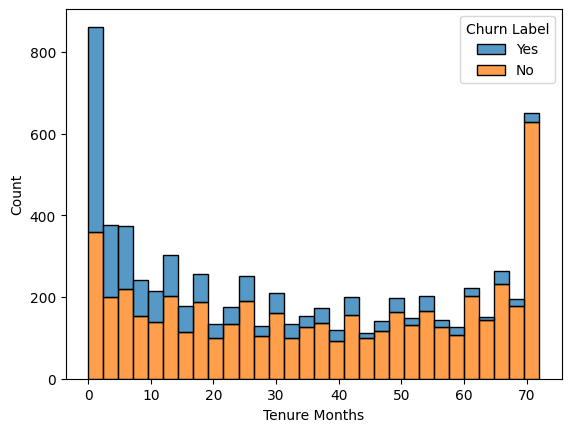

In [107]:
sns.histplot(data=df, x="Tenure Months", hue="Churn Label", multiple="stack", bins=30)

After converting, there are 11 NaN values. So we will check if they are equal to `Monthly Charges x Month`. If they are not, we will fill them with another techniques.

In [108]:
df['Charges']=df['Monthly Charges']*df['Tenure Months']

In [109]:
(df['Charges']==df['Total Charges']).value_counts()

False    6429
True      614
Name: count, dtype: int64

In [110]:
print(df['Charges'].sort_values(ascending=True))


6772       0.0
2438       0.0
2667       0.0
4331       0.0
5104       0.0
         ...  
6850    8460.0
4235    8467.2
1206    8481.6
6372    8510.4
5251    8550.0
Name: Charges, Length: 7043, dtype: float64


In [111]:
df[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,zone_id,Charges
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,0,...,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN,1,0.0
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,1,...,Mailed check,20.25,NaN,No,0,68,5504,NaN,3,0.0
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,0,...,Mailed check,80.85,NaN,No,0,45,2048,NaN,0,0.0
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,1,...,Mailed check,25.75,NaN,No,0,48,4950,NaN,0,0.0
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,0,...,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN,2,0.0
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,1,...,Mailed check,19.85,NaN,No,0,53,2019,NaN,1,0.0
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,1,...,Mailed check,25.35,NaN,No,0,49,2299,NaN,4,0.0
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,0,...,Mailed check,20.00,NaN,No,0,27,3763,NaN,0,0.0
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,1,...,Mailed check,19.70,NaN,No,0,69,4890,NaN,1,0.0
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,0,...,Mailed check,73.35,NaN,No,0,44,2342,NaN,1,0.0


In [112]:
df_charges_combined = df[(df['Total Charges'].isna()) & (df['Charges'] == 0)]

In [113]:
df_charges_combined[['CustomerID','Total Charges','Charges','Tenure Months','Monthly Charges']]

,CustomerID,Total Charges,Charges,Tenure Months,Monthly Charges
2234,4472-LVYGI,NaN,0.0,0,52.55
2438,3115-CZMZD,NaN,0.0,0,20.25
2568,5709-LVOEQ,NaN,0.0,0,80.85
2667,4367-NUYAO,NaN,0.0,0,25.75
2856,1371-DWPAZ,NaN,0.0,0,56.05
4331,7644-OMVMY,NaN,0.0,0,19.85
4687,3213-VVOLG,NaN,0.0,0,25.35
5104,2520-SGTTA,NaN,0.0,0,20.00
5719,2923-ARZLG,NaN,0.0,0,19.70
6772,4075-WKNIU,NaN,0.0,0,73.35


In [114]:
df[['Total Charges','Charges']].head(5)

,Total Charges,Charges
0,108.15,107.7
1,151.65,141.4
2,820.50,797.2
3,3046.05,2934.4
4,5036.30,5081.3


In [115]:
print(df['Total Charges'].sum()-df['Charges'].sum())

1077.25


We will subtract `Charges(Month * Monthly Charge)` from `Total Charges` in order to get `Additional Charges`. We will check this later if this feature is meaningful.

In [116]:
df['Additional Charges']=df['Total Charges']-df['Charges']

In [117]:
df[df['Additional Charges']>=0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,zone_id,Charges,Additional Charges
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,53.85,108.15,Yes,1,86,3239,Competitor made better offer,1,107.70,0.45
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,70.70,151.65,Yes,1,67,2701,Moved,1,141.40,10.25
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,99.65,820.50,Yes,1,86,5372,Moved,1,797.20,23.30
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,104.80,3046.05,Yes,1,84,5003,Moved,1,2934.40,111.65
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,1,...,39.65,39.65,Yes,1,100,5433,Competitor offered more data,1,39.65,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,9710-NJERN,1,United States,California,Palm Desert,92260,"33.694501, -116.412711",33.694501,-116.412711,0,...,20.15,826.00,No,0,44,2007,NaN,4,785.85,40.15
7025,9837-FWLCH,1,United States,California,Palm Springs,92262,"33.839989, -116.659215",33.839989,-116.659215,1,...,19.20,239.00,No,0,73,3101,NaN,4,230.40,8.60
7034,3605-JISKB,1,United States,California,Twentynine Palms,92278,"34.457829, -116.139589",34.457829,-116.139589,1,...,60.00,3316.10,No,0,71,4212,NaN,4,3300.00,16.10
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,0,...,60.65,743.30,No,0,24,3740,NaN,4,727.80,15.50


There are several reasons for this case. For example the Monthly charge price can be changed in time. There can be additional charges besides the main Monthly charge. Customers may freeze their subscriptions time to time. We will drop the columns with `Total Charges == NaN and Charges == 0`

In [118]:
print("Before:", df.shape[0])

Before: 7043


In [119]:
df = df.drop(df[(df['Total Charges'].isna()) & (df['Charges'] == 0) & (df['Tenure Months'] == 0)].index)

In [120]:
print("Sonra:", df.shape[0])

Sonra: 7032


In [121]:
df[df['Charges']==0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,zone_id,Charges,Additional Charges


In [122]:
df[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,zone_id,Charges,Additional Charges


We will explore the features `Senior Citizen , Partner , Dependents`

It is a fact that `senior citizens` less likely to churn in real life. We can see this case in here too.

C:\Users\gokal\AppData\Local\Temp\ipykernel_39096\3493020986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Senior Citizen'],palette='mako')


<Axes: title={'center': 'Count of churns with respect to Senior Citizenship'}, xlabel='Senior Citizen', ylabel='count'>

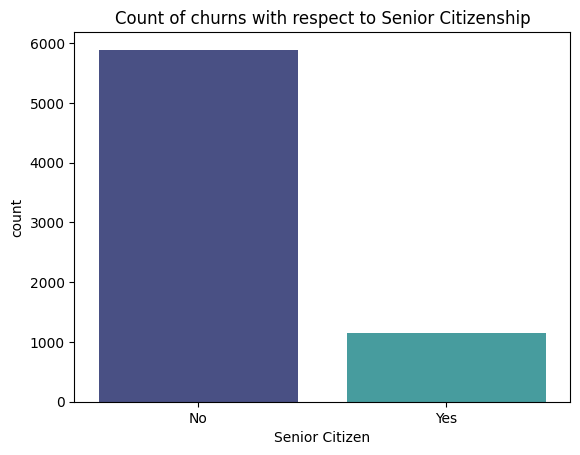

In [123]:
plt.title('Count of churns with respect to Senior Citizenship')
sns.countplot(data=df,x=df['Senior Citizen'],palette='mako')

In [124]:
labelEncoder_citizen=LabelEncoder()

In [125]:
df['Senior Citizen']=labelEncoder_citizen.fit_transform(df['Senior Citizen'])

In [126]:
df['Senior Citizen'].value_counts()

Senior Citizen
0    5890
1    1142
Name: count, dtype: int64

C:\Users\gokal\AppData\Local\Temp\ipykernel_39096\235024286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['Partner'],palette='mako')


<Axes: title={'center': 'Count of churns with respect to Partner'}, xlabel='Partner', ylabel='count'>

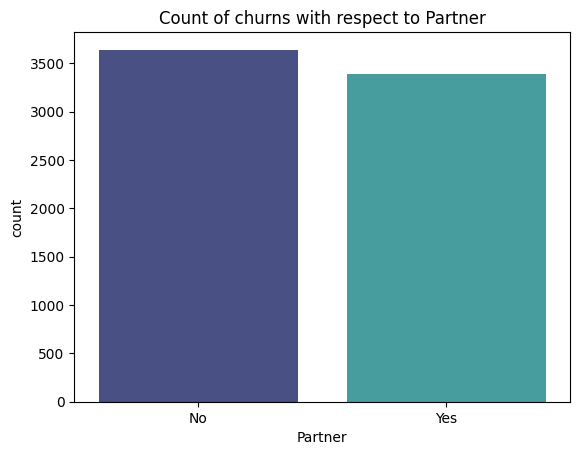

In [127]:
plt.title('Count of churns with respect to Partner')
sns.countplot(data=df,x=df['Partner'],palette='mako')

In [128]:
labelEncoder_Partner=LabelEncoder()

In [129]:
df['Partner']=labelEncoder_Partner.fit_transform(df['Partner'])

In [130]:
labelEncoder_Dependents=LabelEncoder()

In [131]:
df['Dependents']=labelEncoder_Dependents.fit_transform(df['Dependents'])

In [132]:
print(summary)

                     dtype  unique_values
CustomerID          object           7043
Count                int64              1
Country             object              1
State               object              1
City                object           1129
Zip Code             int64           1652
Lat Long            object           1652
Latitude           float64           1652
Longitude          float64           1651
Gender              object              2
Senior Citizen      object              2
Partner             object              2
Dependents          object              2
Tenure Months        int64             73
Phone Service       object              2
Multiple Lines      object              3
Internet Service    object              3
Online Security     object              3
Online Backup       object              3
Device Protection   object              3
Tech Support        object              3
Streaming TV        object              3
Streaming Movies    object        

We can drop unneeded features

In [133]:
df['Churn Label'].value_counts()

Churn Label
No     5163
Yes    1869
Name: count, dtype: int64

In [134]:
df=df.drop(['CustomerID','Count','Country','State','Churn Label','Churn Reason','Lat Long','City','Zip Code','Longitude','Latitude'],axis=1)

In [135]:
categorical_columns = [
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method'
]

In [136]:
labelEncoder_Categorical=LabelEncoder()

In [137]:
for column in categorical_columns:
    df[column] = labelEncoder_Categorical.fit_transform(df[column])

In [138]:
summary = pd.DataFrame({
    'dtype': df.dtypes,
    'unique_values': df.nunique()
})

In [139]:
print(summary)

                      dtype  unique_values
Gender                int32              2
Senior Citizen        int32              2
Partner               int32              2
Dependents            int32              2
Tenure Months         int64             72
Phone Service         int32              2
Multiple Lines        int32              3
Internet Service      int32              3
Online Security       int32              3
Online Backup         int32              3
Device Protection     int32              3
Tech Support          int32              3
Streaming TV          int32              3
Streaming Movies      int32              3
Contract              int32              3
Paperless Billing     int32              2
Payment Method        int32              4
Monthly Charges     float64           1584
Total Charges       float64           6530
Churn Value           int64              2
Churn Score           int64             85
CLTV                  int64           3435
zone_id    

In [140]:
correlations_2=df.corr(numeric_only=True)

<Axes: >

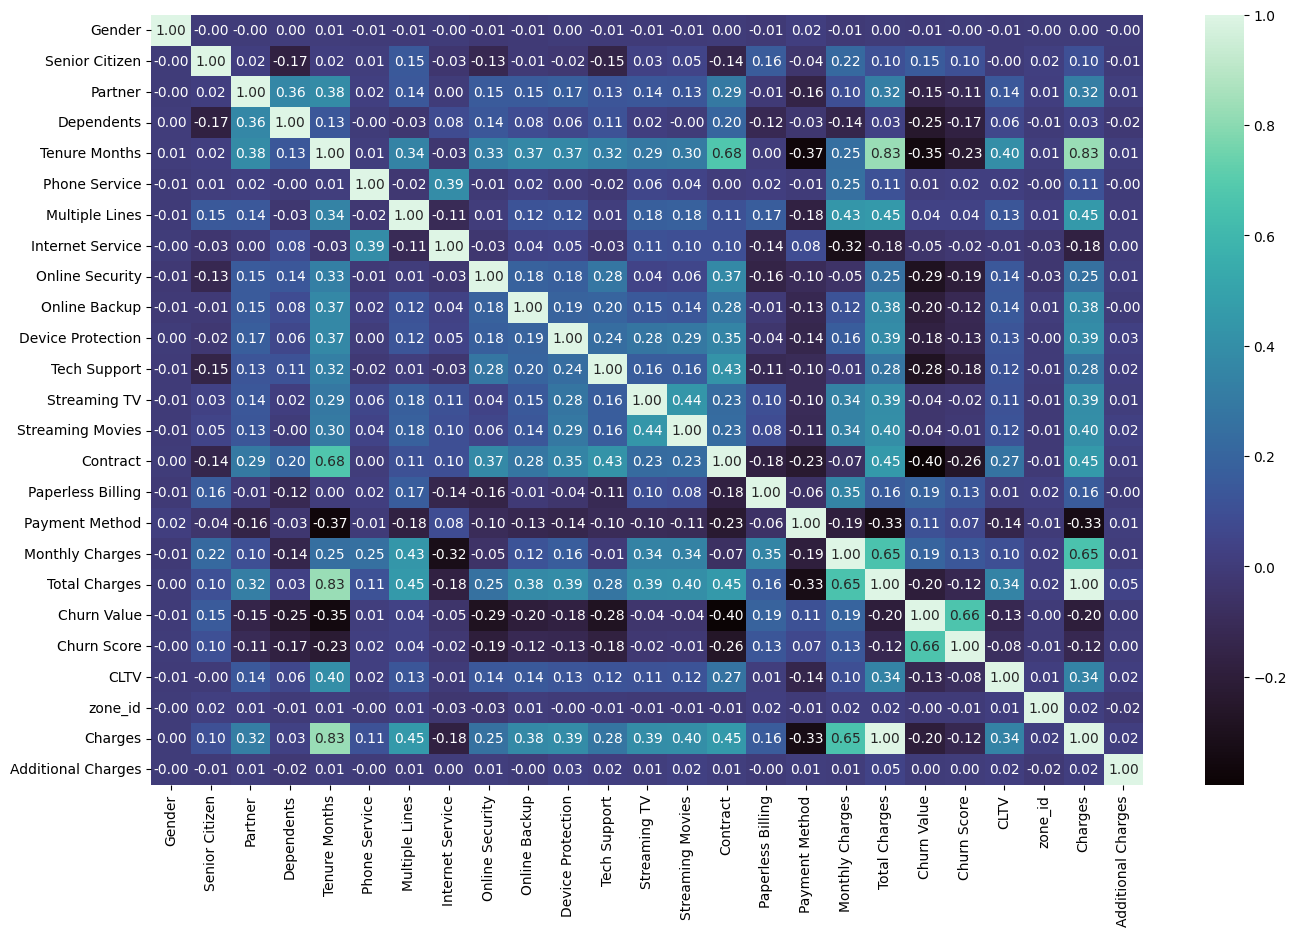

In [141]:
plt.figure(figsize=(16,10))
sns.heatmap(data=correlations_2,annot=True,fmt='.2f',cmap='mako')

So we can see that the `Additional Charges` feature doesn't give any meaningful information, and `Charges` feature shares the same correlation with `Total Charges` so we can drop them.

In [142]:
df=df.drop(['Charges','Additional Charges'],axis=1)

We will look at `Online Security`, `Online Backup` ,`Internet Service` and `Contract Type` features. Internet Service values are `0 -> DSL , 1 -> Fiber Optic and 2 -> No` . This table shows that Fiber Optic users more likely to churn than the other service users.

`Note For Later:` Don't encode before plotting features.

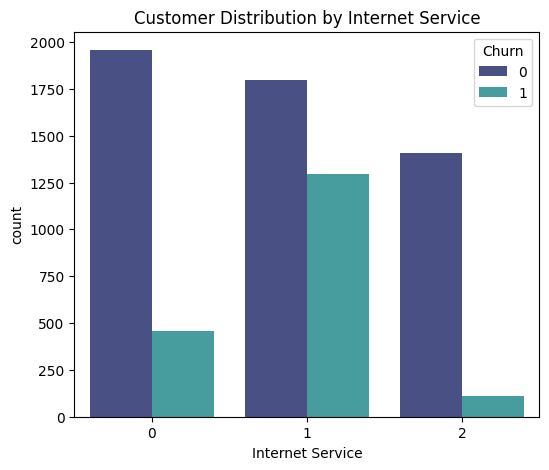

In [143]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Internet Service', hue='Churn Value', palette='mako')
plt.title('Customer Distribution by Internet Service')
plt.legend(title='Churn')
plt.show()

Contract Type values are `0 -> Month-Month , 1 -> 2 Year and 2 -> 1 Year`. The table shows that Monthly subscriptions are more likely to churn than the others. This makes sense in real life because it's short period.

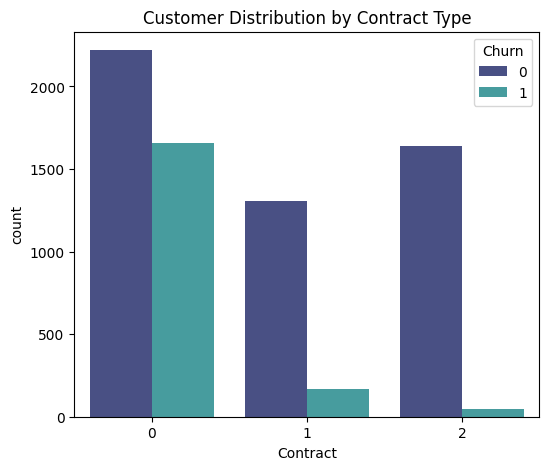

In [144]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Contract', hue='Churn Value', palette='mako')
plt.title('Customer Distribution by Contract Type')
plt.legend(title='Churn')
plt.show()


In [145]:
df['Online Backup'].value_counts()

Online Backup
0    3087
2    2425
1    1520
Name: count, dtype: int64

Online Backup values are `0 -> No , 1 -> Yes and 2 -> No internet service`. The table shows that customer with no Backup is more likely to churn than the others. This makes sense in real life.

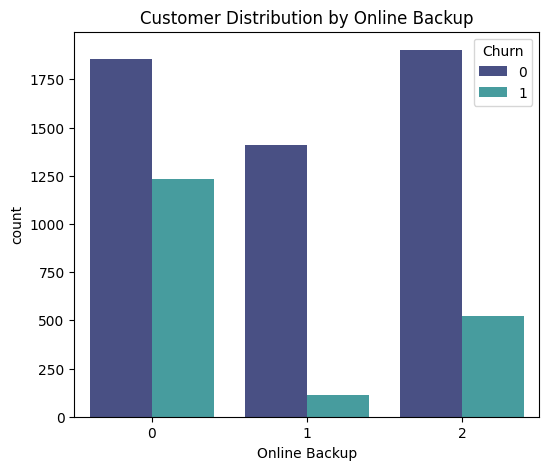

In [146]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Online Backup', hue='Churn Value', palette='mako')
plt.title('Customer Distribution by Online Backup')
plt.legend(title='Churn')
plt.show()

We will check if there is any outlier values.

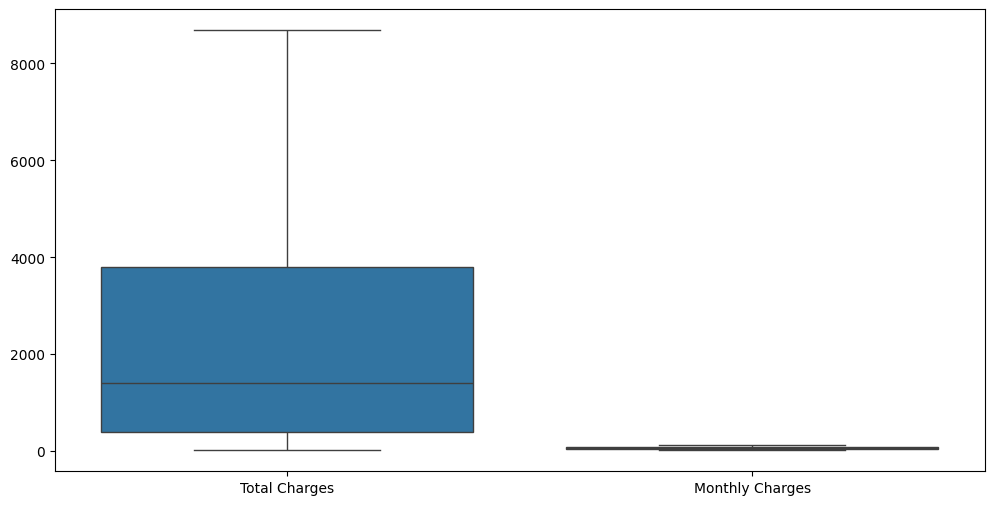

In [147]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Total Charges','Monthly Charges']])
plt.show()

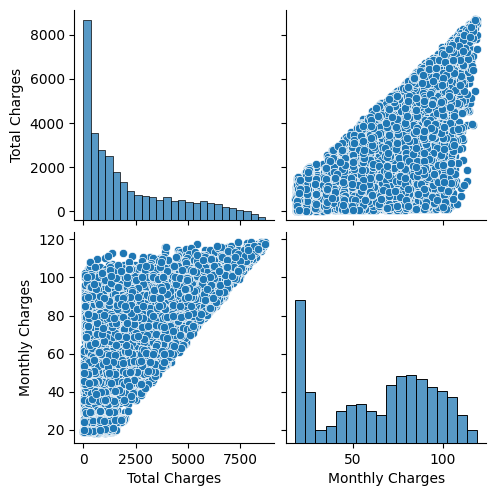

In [148]:
sns.pairplot(df[['Total Charges', 'Monthly Charges']])
plt.show()

We will be looking up to these features.

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.



Values are `0- No  1- Yes  2- No phone service`. We can't see clear correlation between Multiple Lines and Churn.

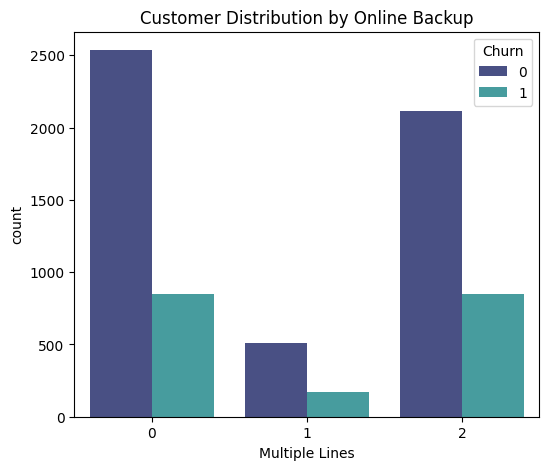

In [149]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Multiple Lines', hue='Churn Value', palette='mako')
plt.title('Customer Distribution by Online Backup')
plt.legend(title='Churn')
plt.show()

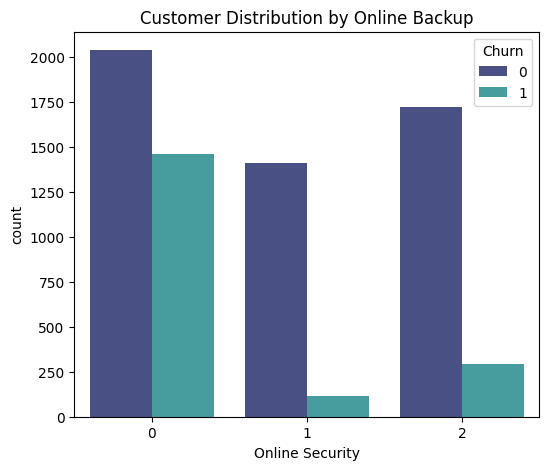

In [150]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Online Security', hue='Churn Value', palette='mako')
plt.title('Customer Distribution by Online Backup')
plt.legend(title='Churn')
plt.show()

In [151]:
df[['CLTV','Total Charges']]

,CLTV,Total Charges
0,3239,108.15
1,2701,151.65
2,5372,820.50
3,5003,3046.05
4,5340,5036.30
...,...,...
7038,5306,1419.40
7039,2140,1990.50
7040,5560,7362.90
7041,2793,346.45


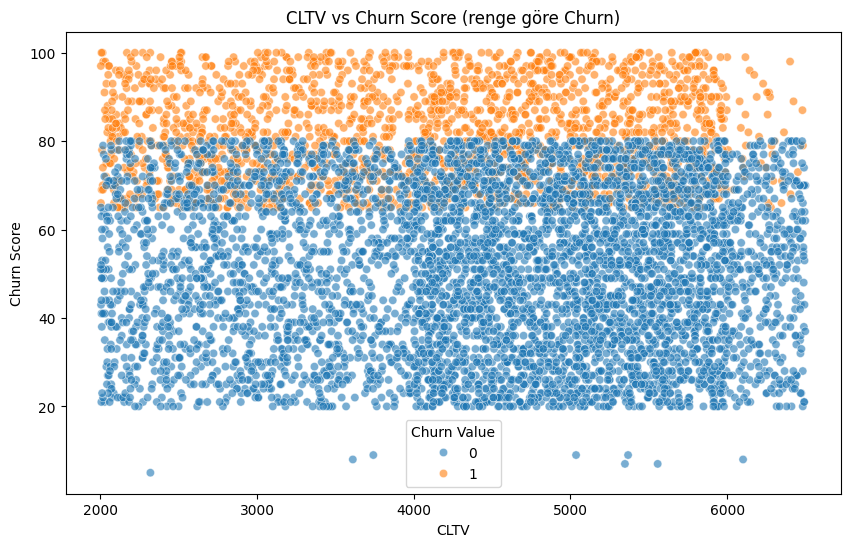

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CLTV', y='Churn Score', hue='Churn Value', alpha=0.6)
plt.title("CLTV vs Churn Score (renge göre Churn)")
plt.show()


Converting claned DataFrame to a csv file.

In [153]:
#df.to_csv('Processed_telco_customer.csv',index=False,header=True)